## Chinook Music Group Micro-Analysis
**Background**
<br>
<br>
Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. You have been asked to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

You might like to consider whether any extra columns from the employee table explain any variance you see, or whether the variance might instead be indicative of employee performance.

**Instructions**
* Write a query that finds the total dollar amount of sales assigned to each sales support agent within the company. Add any extra attributes for that employee that you find are relevant to the analysis.
* Write a short statement describing your results, and providing a possible interpretation.


<div>
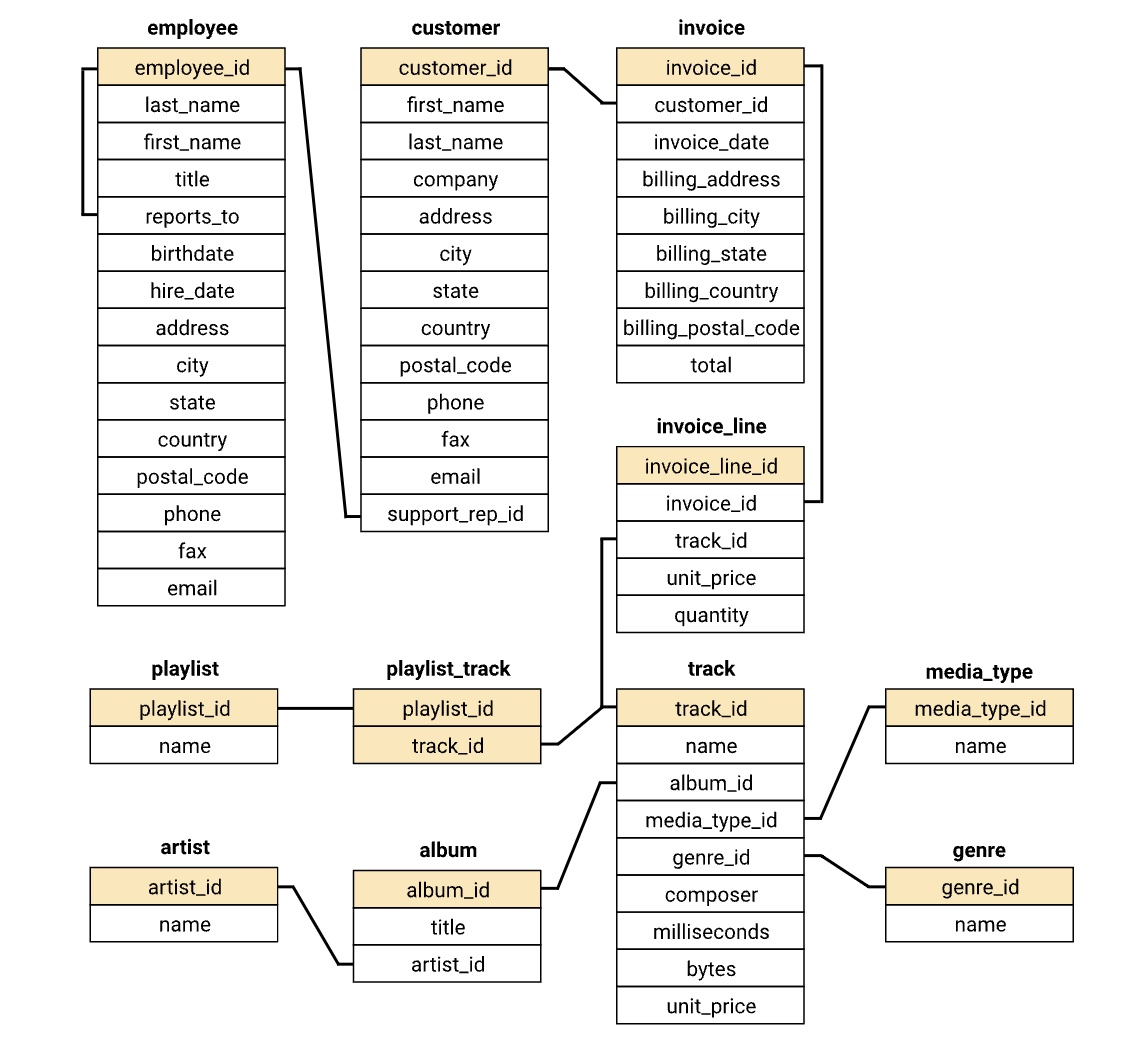
</div>

## Sales Support Agent Performance

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

In [2]:
%%sql
SELECT CAST(SUM(total) AS Int) "Total Sales"
FROM invoice;

 * sqlite:///chinook.db
Done.


Total Sales
4709


In [3]:
%%sql
SELECT COUNT(customer_id) "Number of Customers"
FROM customer

 * sqlite:///chinook.db
Done.


Number of Customers
59


In [4]:
%%sql
WITH
cust_totals AS
    (
     SELECT
        i.customer_id customer_id,
        CAST(SUM(i.total) AS Int) cust_total
     FROM invoice i GROUP BY 1
    ),
avg_sale AS
    (
     SELECT
        e.employee_id,
        ROUND(AVG(i.total), 2) average_sale
     FROM employee e
     INNER JOIN customer c ON c.support_rep_id = e.employee_id
     INNER JOIN invoice i ON i.customer_id = c.customer_id
     GROUP BY 1
    )
SELECT
    e.first_name || " " || e.last_name "Sales Support Agent",
    SUM(ct.cust_total) "Total Sales",
    ROUND(SUM(ct.cust_total)*100/(SELECT CAST(SUM(total) AS Float) FROM invoice), 1) "Percent Total Sales",
    avs.average_sale "Average Sale",
    COUNT(c.customer_id) "Number of Customers",
    COUNT(DISTINCT c.country) "Number of Countries"
FROM customer c
LEFT JOIN cust_totals ct ON ct.customer_id = c.customer_id
LEFT JOIN employee e ON e.employee_id = c.support_rep_id
LEFT JOIN avg_sale avs ON avs.employee_id = e.employee_id
GROUP BY 1;

 * sqlite:///chinook.db
Done.


Sales Support Agent,Total Sales,Percent Total Sales,Average Sale,Number of Customers,Number of Countries
Jane Peacock,1723,36.6,8.17,21,10
Margaret Park,1577,33.5,7.4,20,12
Steve Johnson,1389,29.5,7.41,18,13


In [5]:
%%sql
WITH cust_totals AS
    (
     SELECT
        i.customer_id customer_id,
        CAST(SUM(i.total) AS Int) cust_total
     FROM invoice i GROUP BY 1
    )
SELECT
    e.first_name || " " || e.last_name "Sales Support Agent",
    c.country "Country",
    SUM(cust_totals.cust_total) "Total Sales"
FROM customer c
LEFT JOIN cust_totals ON cust_totals.customer_id = c.customer_id
LEFT JOIN employee e ON e.employee_id = c.support_rep_id
GROUP BY 2, 1
ORDER BY 2, 3 DESC

 * sqlite:///chinook.db
Done.


Sales Support Agent,Country,Total Sales
Margaret Park,Argentina,39
Margaret Park,Australia,81
Steve Johnson,Austria,69
Margaret Park,Belgium,60
Jane Peacock,Brazil,190
Margaret Park,Brazil,166
Steve Johnson,Brazil,69
Jane Peacock,Canada,371
Steve Johnson,Canada,91
Margaret Park,Canada,70


**Sales Support Agent Performance Conclusion**
* The three sales support agents are separated by about 3% of Chinook Music Groups total sales for 1st, 2nd, and 3rd place. Jane Peacock has the most sales, but also has the largest number of customers and the highest average sale. 
* Steve Johnson, 3rd place, has the same average sale as Margaret Park in 2nd place, but she has more customers.
* Steve has the most countries in his sales profile, so that doesn't appear to be strongly correlated to having a high percent of total sales.
* Also, when comparing sales within the same country, Jane often has the highest total but not always. Margaret and Steve do not show any particular advantage. Margaret's US market has the most sales for any country.